From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# 분해 (Decomposition)
* 큰 하나의 행렬을 여러개의 작은 행렬로 분해
* 분해 과정에서 중요한 정보만 남게됨

## 데이터 불러오기 및 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF,LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [3]:
def plot_iris(iris, labels):
    plt.figure()
    colors = ['navy', 'purple', 'red']
    for xy, label in zip(iris, labels):
        plt.scatter(xy[0], xy[1], color=colors[label])

In [4]:
def show_faces(faces):
    plt.figure()
    num_rows, num_cols = 2, 3
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(np.reshape(faces[i], (64,64)), cmap=plt.cm.gray)

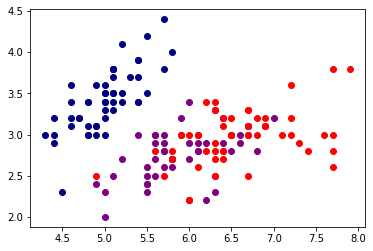

In [5]:
plot_iris(iris[:, :2], labels)

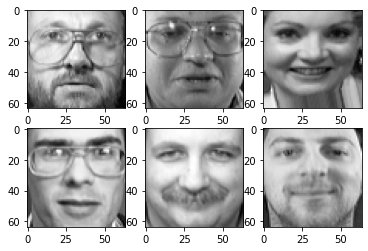

In [6]:
show_faces(faces)

## Principal Component Analysis (PCA)

* PCA를 사용해 iris 데이터 변환
* $150 \times 4$ 크기의 데이터를 $150 \times 2$ 크기의 행렬로 압축

In [7]:
model = PCA(n_components=2, random_state=2022)  # 2: COL수
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

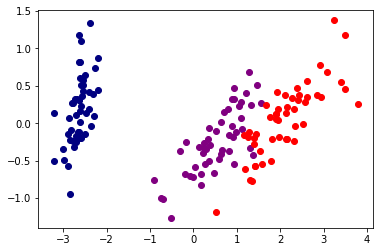

In [8]:
plot_iris(transformed_iris, labels)

* PCA를 통해 학습된 각 컴포넌트 (6개)
* 각 컴포넌트는 얼굴의 주요 특징을 나타냄

In [9]:
model = PCA(n_components=2*3, random_state=2022)
model.fit(faces)
faces_components = model.components_
faces_components.shape

(6, 4096)

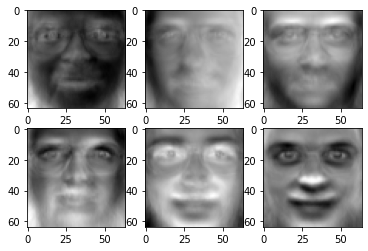

In [10]:
show_faces(faces_components)

## Incremental PCA

* PCA는 SVD(Singular value decomposition) 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
* Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
* 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용

In [11]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

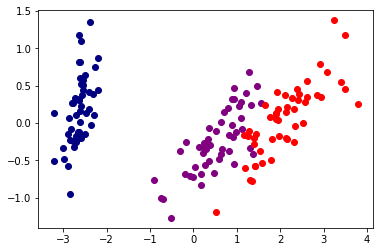

In [12]:
plot_iris(transformed_iris, labels)

In [13]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
transformed_faces = model.components_
transformed_faces.shape

(6, 4096)

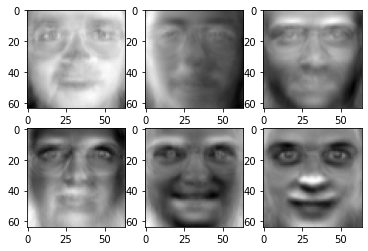

In [14]:
show_faces(transformed_faces)

## Kernel PCA

* 차원 축소를 위한 복잡한 비선형 투형

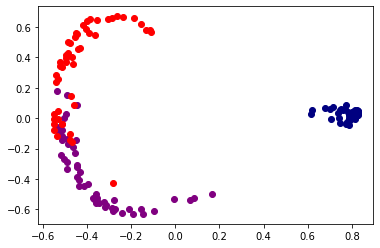

In [15]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=2022)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

In [16]:
model = KernelPCA(n_components=2*3, kernel='rbf', random_state=2022)
model.fit(faces)
faces_components = model.components_  # .components_ 가 없어서 돌아가지 않음.
show_faces(faces_components)

AttributeError: 'KernelPCA' object has no attribute 'components_'

## Sparse PCA

* PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형결합으로 나타난다는 점
* 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형결합으로 주성분을 나타냄으로써 이러한 단점을 극복

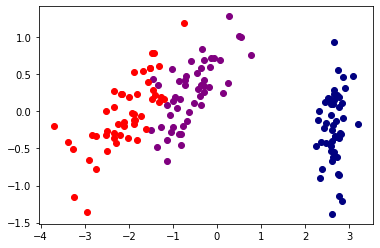

In [17]:
model = SparsePCA(n_components=2, random_state=2022)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

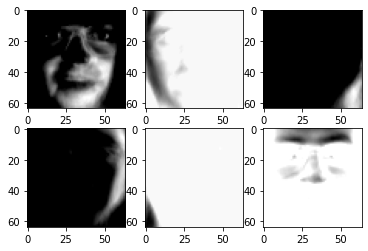

In [18]:
model = SparsePCA(n_components=2*3, random_state=2022)
model.fit(faces)
transformed_faces = model.components_
show_faces(transformed_faces)

## Truncated Singular Value Decomposition (Truncated SVD)

* PCA는 정방행렬에 대해서만 행렬 분해 가능
* SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능
* 전체 행렬 크기에 대해 Full SVD를 사용하는 경우는 적음
* 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

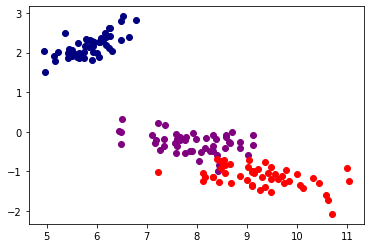

In [19]:
model = TruncatedSVD(n_components=2, random_state=2022)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

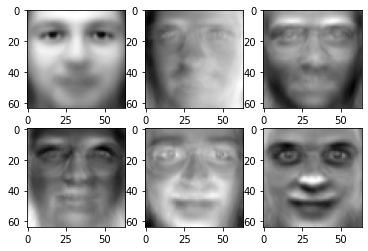

In [20]:
model = TruncatedSVD(n_components=2*3, random_state=2022)
model.fit(faces)
transformed_faces = model.components_
show_faces(transformed_faces)

## Dictionary Learning

* Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
* Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
* 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남

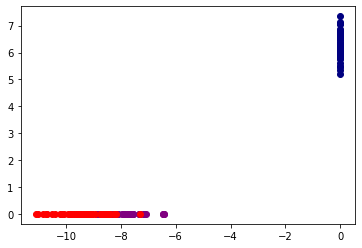

In [21]:
model = DictionaryLearning(n_components=2, random_state=2022)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

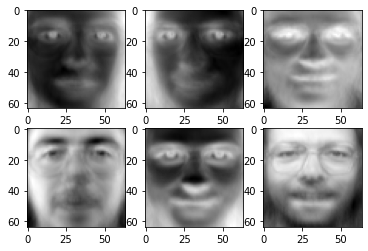

In [22]:
model = DictionaryLearning(n_components=2*3, random_state=2022)
model.fit(faces)
transformed_faces = model.components_
show_faces(transformed_faces)

## Factor Analysis

* 요인 분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법
* 요인 분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
* PCA에서는 오차(error)를 고려하지 않고, 요인 분석에서는 오차(error)를 고려

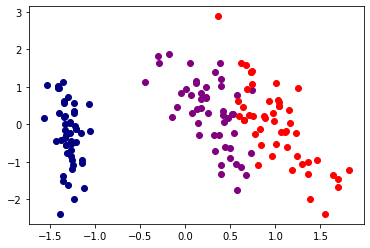

In [23]:
model = FactorAnalysis(n_components=2, random_state=2022)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

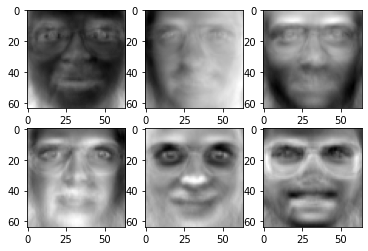

In [24]:
model = FactorAnalysis(n_components=2*3, random_state=2022)
model.fit(faces)
transformed_faces = model.components_
show_faces(transformed_faces)

## Independent Component Analysis(ICA)

* 독립 성분 분석(Independent Component Analysis, ICA)은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
* ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

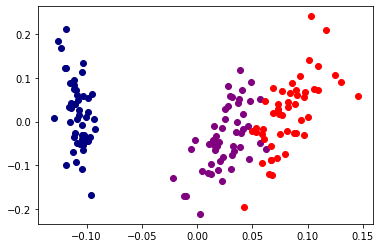

In [25]:
model = FastICA(n_components=2, random_state=2022)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [27]:
model = DecisionTreeClassifier()
score_trans = cross_val_score(estimator=model,
                       X=transformed_iris, y=labels,
                       cv=5)
score_ori = cross_val_score(estimator=model,
                       X=iris, y=labels,
                       cv=5)
print("ori_score: {} (+/- {})".format(score_ori.mean(), score_ori.std()))
print("trans_score: {} (+/- {})".format(score_trans.mean(), score_trans.std()))

ori_score: 0.9533333333333334 (+/- 0.03399346342395189)
trans_score: 0.9333333333333333 (+/- 0.02108185106778919)


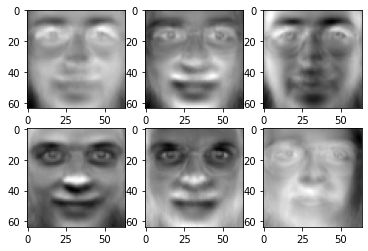

In [28]:
model = FastICA(n_components=2*3, random_state=2022)
model.fit(faces)
transformed_faces = model.components_
show_faces(transformed_faces)

## Non-negative Matrix Factorization

* 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


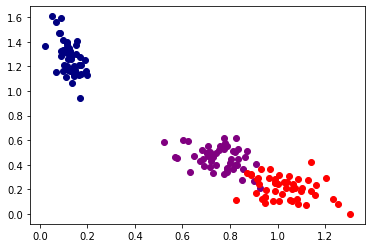

In [29]:
model = NMF(n_components=2, random_state=2022)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


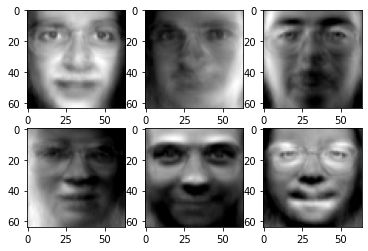

In [30]:
model = NMF(n_components=2*3, random_state=2022)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Latent Dirichlet Allocation (LDA)

* 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
* 디리클레 분포에 따라 잠재적인 의미 구조를 파악


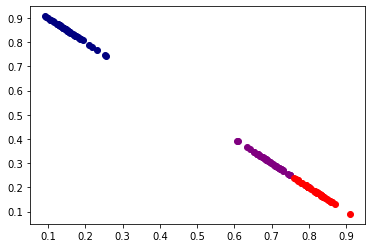

In [31]:
model = LatentDirichletAllocation(n_components=2, random_state=2022)
model.fit(iris)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

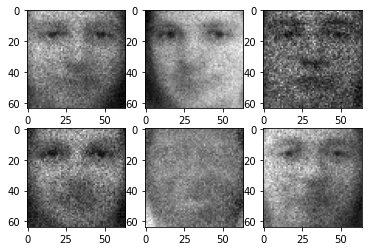

In [32]:
model = LatentDirichletAllocation(n_components=2*3, random_state=2022)
model.fit(faces)
faces_components = model.components_
show_faces(faces_components)

## Linear Discriminant Analysis (LDA)

* LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
* LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스르 분별할 수 있는 기준을 최대한 유지하면서 차원 축소 (클래스가 있는 분류데이터에서만 사용)

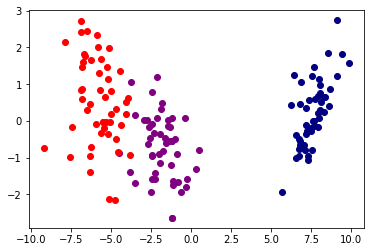

In [33]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습
* 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [35]:
def min_max_scale(x):
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x - min_value)/(max_value - min_value)
    return x

In [36]:
def plot_digits(digits, labels):
    digits = min_max_scale(digits)
    ax = plt.subplot(111, projection='3d')
    for i in range(digits.shape[0]):
        ax.text(digits[i,0], digits[i,1], digits[i,2],
               str(labels[i]), color=plt.cm.Set1(labels[i]/10.),
                fontdict={'weight': 'bold', 'size': 9})
    ax.view_init(4, -72)

In [37]:
digits = load_digits()
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [38]:
print(digits.data.shape)
print(decomposed_digits.shape)  # 64에서 3차원으로 줄임

(1797, 64)
(1797, 3)


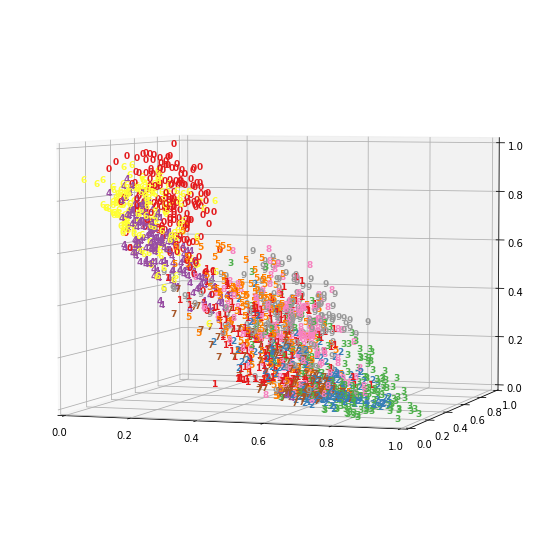

In [39]:
plt.figure(figsize=(20,10))
plot_digits(decomposed_digits, digits.target)

In [40]:
np.max(digits.data, axis=0).shape

(64,)

### KNN

In [41]:
knn = KNeighborsClassifier()

In [42]:
score = cross_val_score(estimator=knn,
                       X = digits.data, y=digits.target,
                       cv=5)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [43]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9627282575054161 (+/- 0.011168537355954218)


In [44]:
score = cross_val_score(estimator=knn,
                       X = decomposed_digits, y=digits.target,
                       cv=5)
score

array([0.54722222, 0.58055556, 0.64066852, 0.59610028, 0.56267409])

In [45]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.5854441349427422 (+/- 0.03214521445075084)


### SVM

In [46]:
svm = SVC()

In [47]:
score = cross_val_score(estimator=svm,
                       X = digits.data, y=digits.target,
                       cv=5)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [48]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9632838130609718 (+/- 0.02008605863225686)


In [49]:
score = cross_val_score(estimator=svm,
                       X = decomposed_digits, y=digits.target,
                       cv=5)
score

array([0.61388889, 0.62222222, 0.66016713, 0.60167131, 0.59888579])

In [50]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6193670690188796 (+/- 0.022070024720937543)


### Decision Tree

In [51]:
decision_tree = DecisionTreeClassifier()

In [52]:
score = cross_val_score(estimator=decision_tree,
                   X = digits.data, y=digits.target,
                   cv=5)
score

array([0.77777778, 0.7       , 0.79665738, 0.83844011, 0.78830084])

In [53]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7802352212937171 (+/- 0.04509164109682813)


In [54]:
score = cross_val_score(estimator=decision_tree,
                   X = decomposed_digits, y=digits.target,
                   cv=5)
score

array([0.58888889, 0.50833333, 0.58774373, 0.57381616, 0.49860724])

In [55]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.5514778706282886 (+/- 0.03967505628986891)


### Random Forest

In [56]:
random_forest = RandomForestClassifier()

In [57]:
score = cross_val_score(estimator=random_forest,
                   X = digits.data, y=digits.target,
                   cv=5)
score

array([0.93055556, 0.91388889, 0.95543175, 0.96100279, 0.92479109])

In [58]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9371340142370783 (+/- 0.018113450221600692)


In [59]:
score = cross_val_score(estimator=random_forest,
                   X = decomposed_digits, y=digits.target,
                   cv=5)
score

array([0.57222222, 0.61666667, 0.66295265, 0.59331476, 0.54874652])

In [60]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.5987805632930981 (+/- 0.039183147020447714)


## 복원된 표현을 사용한 학습
* 분해 후 복원된 행렬을 사용해 학습

In [61]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components  # @: 행렬 곱 연산
reconstructed_digits.shape  # 64로 복원되었음.

(1797, 64)

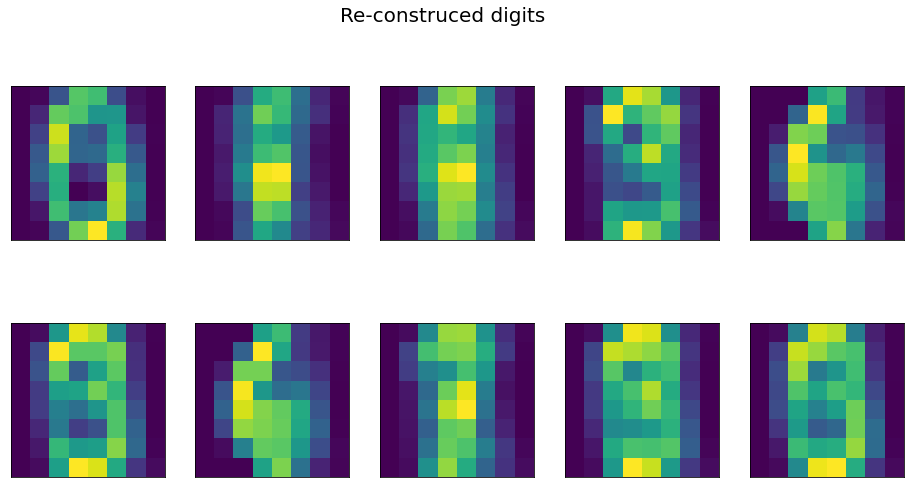

In [62]:
plt.figure(figsize=(16,8))
plt.suptitle("Re-construced digits", fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_digits[i].reshape(8,8))

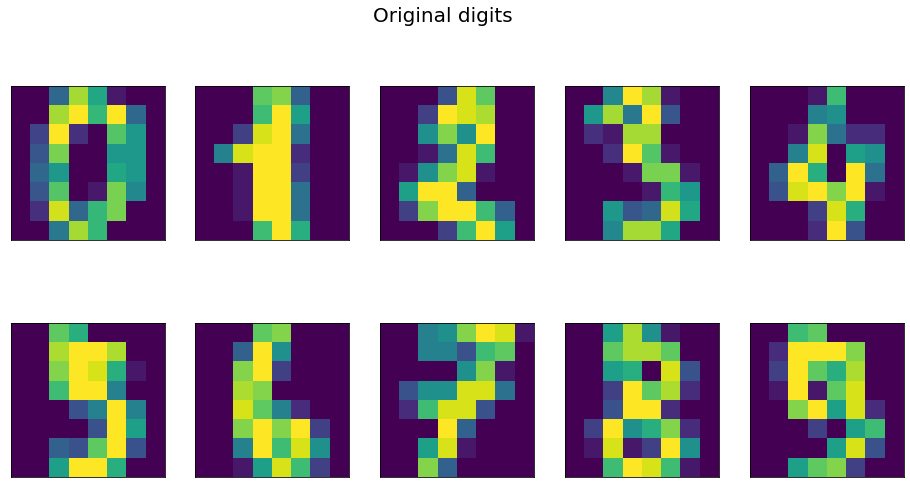

In [63]:
plt.figure(figsize=(16,8))
plt.suptitle("Original digits", fontsize=20)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digits.data[i].reshape(8,8))

### KNN

In [64]:
score = cross_val_score(estimator=knn,
                   X = reconstructed_digits, y=digits.target,
                   cv=5)
score

array([0.54166667, 0.59444444, 0.66295265, 0.57660167, 0.57381616])

In [65]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.5898963169297431 (+/- 0.04029722337499952)


### SVM

In [66]:
score = cross_val_score(estimator=svm,
                   X = reconstructed_digits, y=digits.target,
                   cv=5)
score

array([0.62777778, 0.60555556, 0.66016713, 0.61002786, 0.5821727 ])

In [67]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.6171402042711235 (+/- 0.025969174809053776)


### Decision Tree

In [68]:
score = cross_val_score(estimator=decision_tree,
                   X = reconstructed_digits, y=digits.target,
                   cv=5)
score

array([0.58333333, 0.54444444, 0.55710306, 0.57103064, 0.52924791])

In [69]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.5570318786753328 (+/- 0.01906897632131412)


### Random Forest

In [70]:
score = cross_val_score(estimator=random_forest,
                   X = reconstructed_digits, y=digits.target,
                   cv=5)
score

array([0.57222222, 0.58055556, 0.63509749, 0.59888579, 0.58495822])

In [71]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.5943438563912101 (+/- 0.02213170691935882)


## 이미지 복원

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
train_faces, test_faces = train_test_split(faces, test_size=0.1)

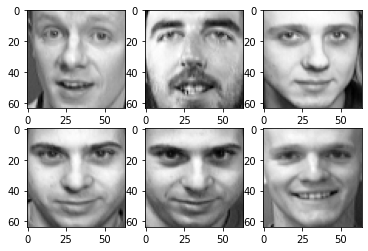

In [74]:
show_faces(train_faces)

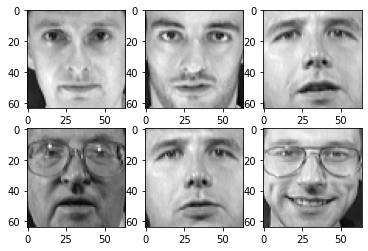

In [75]:
show_faces(test_faces)

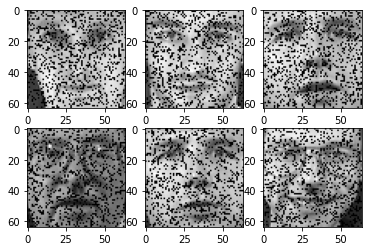

In [76]:
damaged_faces = []
for face in test_faces:
    idx = np.random.choice(range(64*64), size=1024)
    damaged_face = face.copy()
    damaged_face[idx] = 0.
    damaged_faces.append(damaged_face)
show_faces(damaged_faces)

In [78]:
nmf = NMF(n_components=10)
nmf.fit(train_faces)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=10)

In [79]:
train_faces.shape, test_faces.shape

((360, 4096), (40, 4096))

In [80]:
np.array(damaged_faces).shape

(40, 4096)

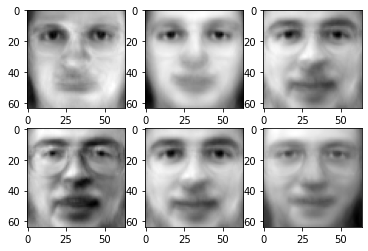

In [82]:
matrix1 = nmf.transform(np.array(damaged_faces))
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [84]:
nmf = NMF(n_components=100)
nmf.fit(train_faces)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=100)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


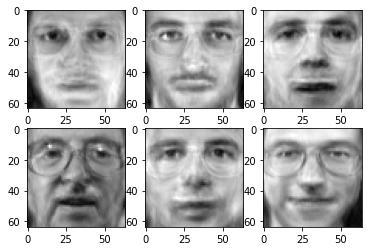

In [85]:
matrix1 = nmf.transform(np.array(damaged_faces))
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [86]:
nmf = NMF(n_components=300)
nmf.fit(train_faces)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=300)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


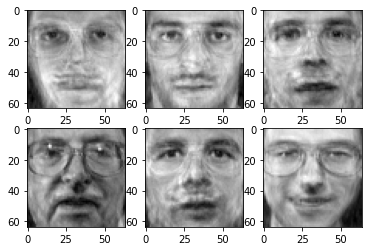

In [87]:
matrix1 = nmf.transform(np.array(damaged_faces))
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)